# Exploratory Data Analysis of the Dataset

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os

from scipy.stats import kurtosis
from scipy.stats import skew

sns.set()

## Directories

We are checking the current directory in order to write all the paths that we need

In [2]:
current_dir = os.getcwd()
train_file_path = os.path.join(current_dir, 'CMAPSSData/train_FD001.txt')
test_file_path = os.path.join(current_dir, 'CMAPSSData/test_FD001.txt')
RUL_file_path = os.path.join(current_dir, 'CMAPSSData/RUL_FD001.txt')

* train_FD001.txt: contains the train set (operations for 100 engines with the different features measured and settings)
* test_FD001.txt: same as the previous file but for testing
* RUL_FD001.txt: contains the number of cycles left (RUL) for the engines in test_FD001.txt

In [3]:
column_names = ['unit_no', 'cycles', 'setting_1', 'setting_2', 'setting_3']
sensor_names = ['sensor_{}'.format(i) for i in range(1, 22)]

features_names = column_names + sensor_names

We are importing the data as pandas dataframes

In [4]:
train = pd.read_csv(train_file_path, sep='\s+', header = None, names = features_names)
test = pd.read_csv(test_file_path, sep='\s+', header = None, names = features_names)
RUL = pd.read_csv(RUL_file_path, sep='\s+', header=None, names = ['RUL'])

## utils functions

In [5]:
sensor_param = [
    "T2", "T24", "T30", "T50", "P2", "P15", "P30", "Nf", "Nc", "epr", "Ps30", "phi", "NRf", "NRc", "BPR", "farB", "htBleed",
    "Nf_dmd", "PCNfR_dmd", "W31", "W32"
]

In [6]:
def append_rul(df):
    df_by_unit_no = df.groupby('unit_no')
    max_nb_cycles = pd.DataFrame(df_by_unit_no['cycles'].max()).rename(columns={'cycles': 'max_cycles'})
    output = df.merge(max_nb_cycles, how = 'inner', on = 'unit_no')
    output['RUL'] = output['max_cycles'] - output['cycles']
    output = output.drop(columns=['cycles', 'max_cycles'])
    return output

In [7]:
def plot_distribution(feature):
    plt.figure(figsize=(10, 7))

    sns.histplot(data = df, x=feature)
    plt.xlabel(feature)
    plt.ylabel('Number of records')
    plt.title('Distribution of the {} for the 100 engines in the data'.format(feature), fontdict={'size':14})
    plt.tight_layout()
    plt.savefig('./eda_figs/distribution_{}'.format(feature), orientation='landscape');

In [8]:
def plot_boxplot(feature):
    plt.figure(figsize=(10, 7))

    sns.boxplot(data = df, x=feature)
    plt.xlabel(feature)
    plt.title('Boxplot of the {} for the 100 engines in the data'.format(feature), fontdict={'size':14})
    plt.tight_layout()
    plt.savefig('./eda_figs/boxplot_{}'.format(feature), orientation='landscape');

In [9]:
df = append_rul(train)

In [10]:
sample = df[df['unit_no'].apply(lambda x: x in [8, 23, 24])]

In [11]:
custom_palette = sns.color_palette("tab10", 3)
def plot_relationship_rul(feature):
    
    fig, ax = plt.subplots(figsize=(12, 6))

    sns.lineplot(data = sample, x = 'RUL', y = feature, hue='unit_no', palette=custom_palette)
    ax.set_title('RUL against {}'.format(feature))
    ax.invert_xaxis()
    plt.tight_layout()
    plt.savefig('./eda_figs/relationship{}'.format(feature), orientation='landscape')

In [12]:
def print_skewness_kurtosis(feature):
    print('Skewness for {} is {}'.format(feature, skew(df[feature])))
    print('Kurtosis for {} is {}'.format(feature, kurtosis(df[feature])))

## Descriptive Statistics

In [13]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   unit_no    20631 non-null  int64  
 1   cycles     20631 non-null  int64  
 2   setting_1  20631 non-null  float64
 3   setting_2  20631 non-null  float64
 4   setting_3  20631 non-null  float64
 5   sensor_1   20631 non-null  float64
 6   sensor_2   20631 non-null  float64
 7   sensor_3   20631 non-null  float64
 8   sensor_4   20631 non-null  float64
 9   sensor_5   20631 non-null  float64
 10  sensor_6   20631 non-null  float64
 11  sensor_7   20631 non-null  float64
 12  sensor_8   20631 non-null  float64
 13  sensor_9   20631 non-null  float64
 14  sensor_10  20631 non-null  float64
 15  sensor_11  20631 non-null  float64
 16  sensor_12  20631 non-null  float64
 17  sensor_13  20631 non-null  float64
 18  sensor_14  20631 non-null  float64
 19  sensor_15  20631 non-null  float64
 20  sensor

We can see that:
* most of the features are numerical (float or integer)
* we have 20 631 entries for 100 engines
* we have 26 columns

## Checking for mising values

In [14]:
train.isna().sum()

unit_no      0
cycles       0
setting_1    0
setting_2    0
setting_3    0
sensor_1     0
sensor_2     0
sensor_3     0
sensor_4     0
sensor_5     0
sensor_6     0
sensor_7     0
sensor_8     0
sensor_9     0
sensor_10    0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_15    0
sensor_16    0
sensor_17    0
sensor_18    0
sensor_19    0
sensor_20    0
sensor_21    0
dtype: int64

As we can see, we don't have missing value in our data

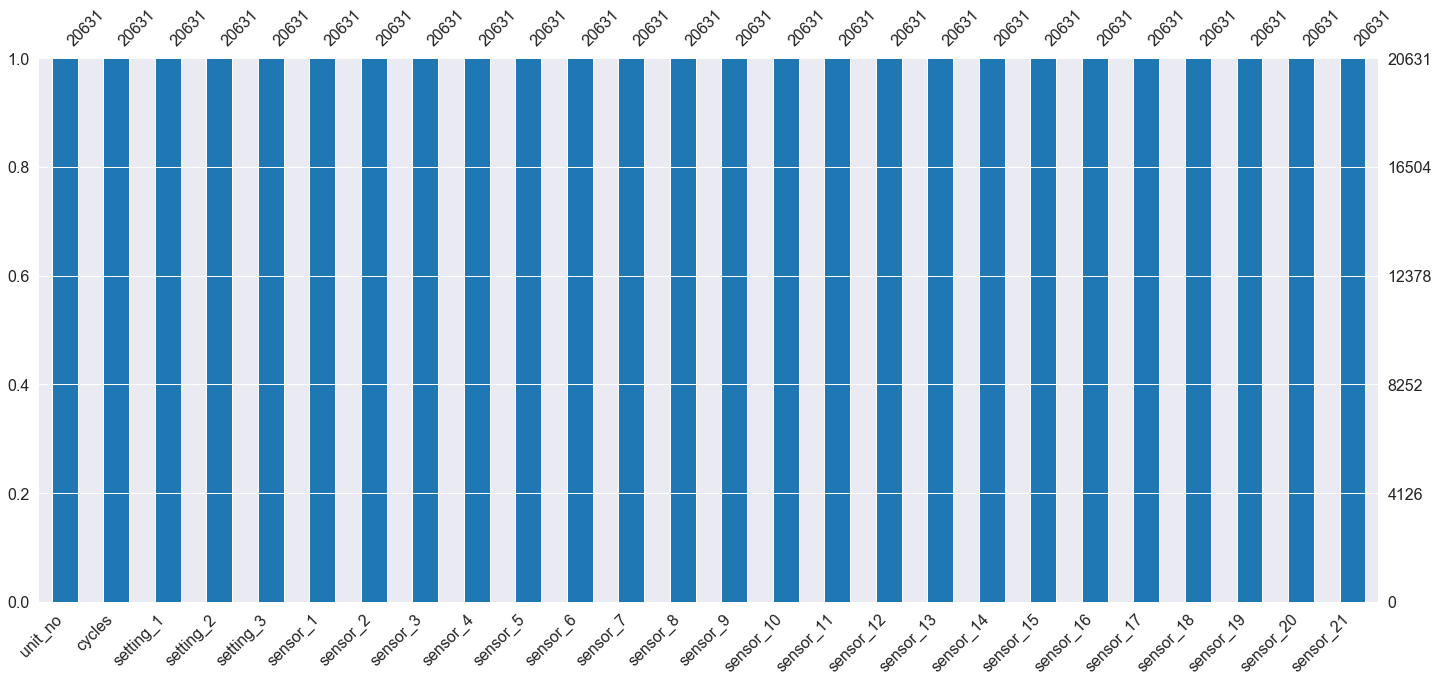

In [15]:
msno.bar(train, color="tab:blue");

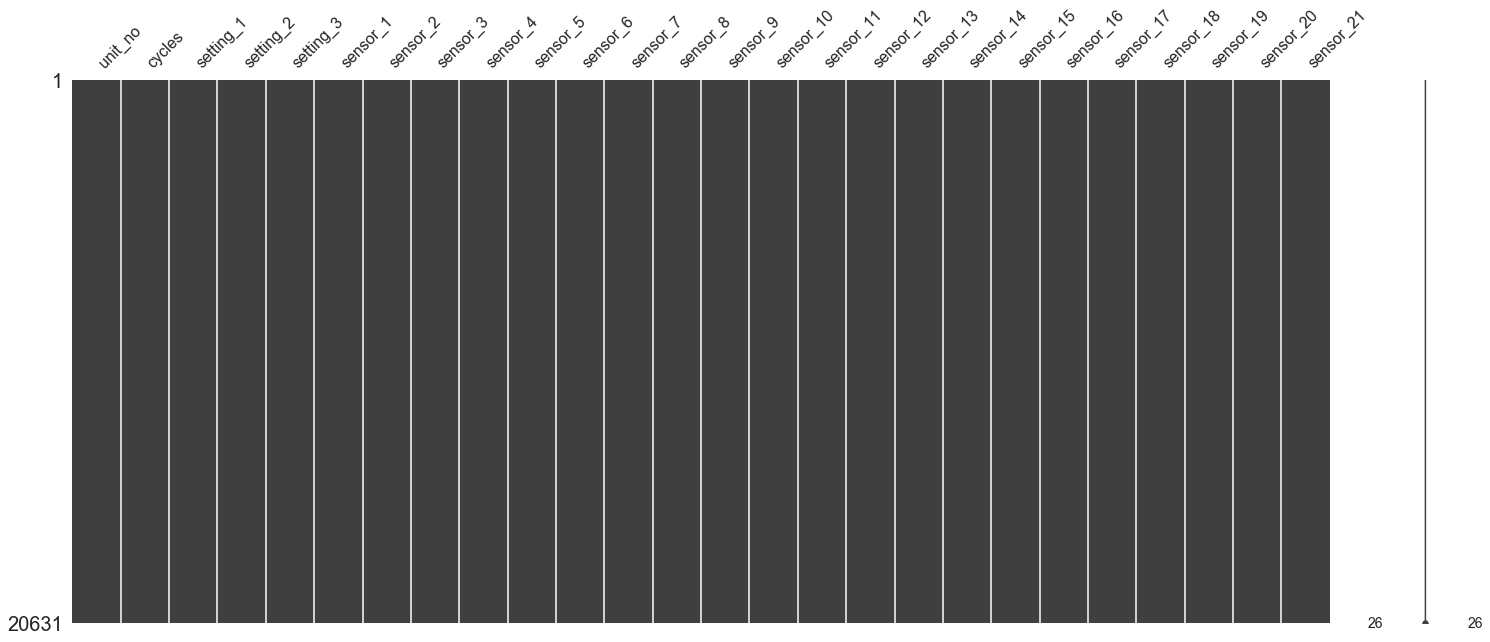

In [16]:
msno.matrix(train);

## Constant columns

In [17]:
constant_cols = []
for col in train.columns:
    if train[col].nunique() == 1:
        constant_cols.append(col)
        
print('List of constant columns')
print(constant_cols)

List of constant columns
['setting_3', 'sensor_1', 'sensor_5', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19']


### What are the parameters that stay constant? 

* sensor_1 : T2 (total temperature at fan inlet)
* sensor_5 : P2 (pressure at fan inlet)
* sensor_10 : epr (Engine pressure ratio)
* sensor_16 : farB (Burner fuel-air ratio)
* sensor_18 : Nf_dmd (Demanded fan speed)
* sensor_19 : PCNfR_dmd (Demanded corrected fan speed)

In [18]:
remaining_sensors = list(set(sensor_names) - set(constant_cols))
remaining_sensors.sort(reverse=False, key=lambda x: int(x.split('_')[1]))

### What are the remaining parameters to study ?

In [19]:
remaining_sensors

['sensor_2',
 'sensor_3',
 'sensor_4',
 'sensor_6',
 'sensor_7',
 'sensor_8',
 'sensor_9',
 'sensor_11',
 'sensor_12',
 'sensor_13',
 'sensor_14',
 'sensor_15',
 'sensor_17',
 'sensor_20',
 'sensor_21']

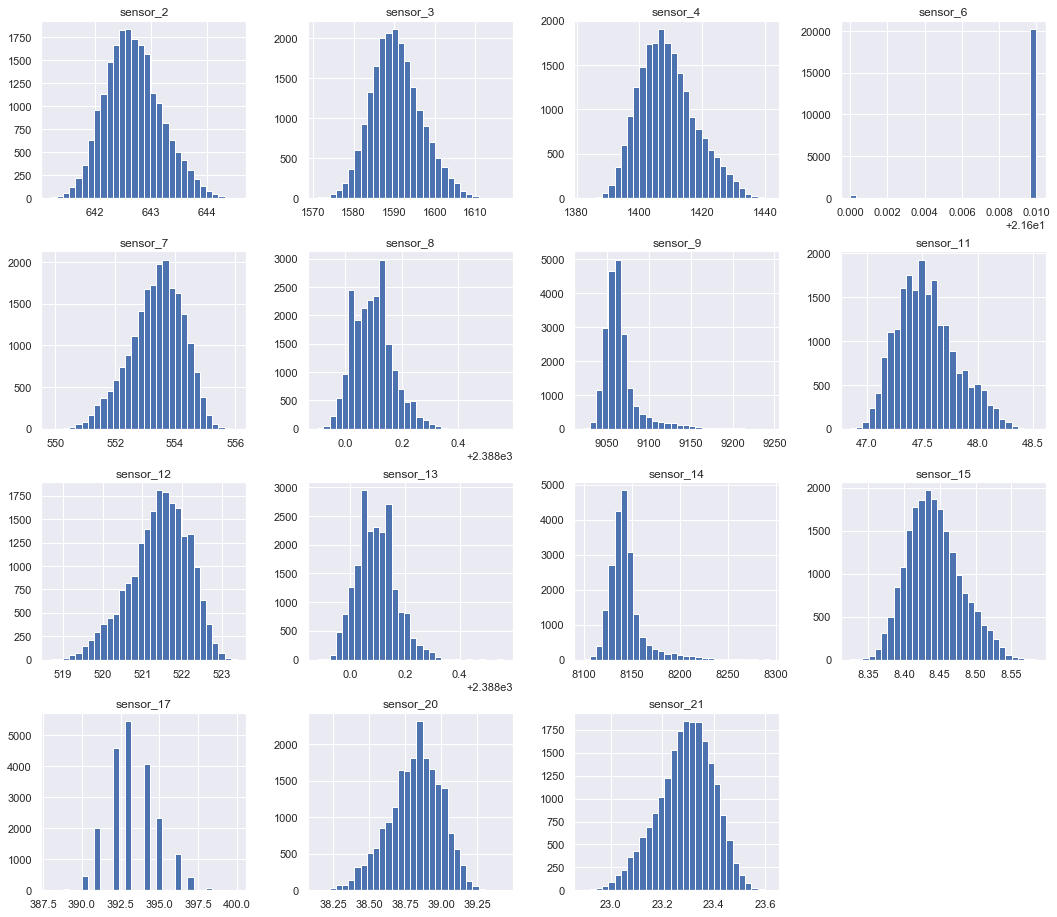

In [20]:
train[remaining_sensors].hist(bins=30, figsize=(18, 16));

## EDA of the remaining features

### Distribution of the RUL

In [21]:
train.groupby('unit_no').cycles.max().describe()

count    100.000000
mean     206.310000
std       46.342749
min      128.000000
25%      177.000000
50%      199.000000
75%      229.250000
max      362.000000
Name: cycles, dtype: float64

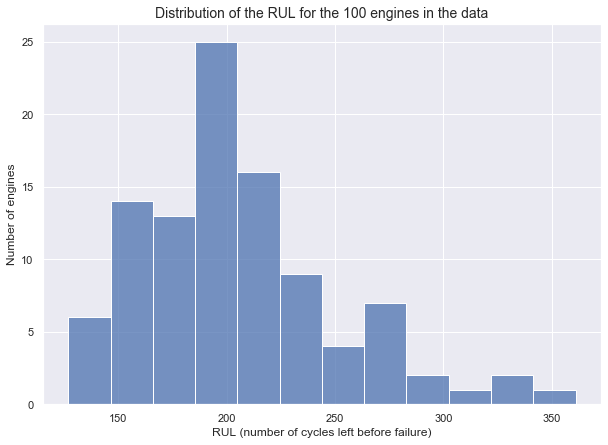

In [22]:
plt.figure(figsize=(10, 7))

sns.histplot(data = df.groupby('unit_no')['RUL'].describe(), x = 'max', bins=12)
plt.xlabel('RUL (number of cycles left before failure)')
plt.ylabel('Number of engines')
plt.title('Distribution of the RUL for the 100 engines in the data', fontdict={'size':14});

In [23]:
skew(train.groupby('unit_no').cycles.max())

1.0159342583415127

In [24]:
kurtosis(df.groupby('unit_no')['RUL'].max())

1.113867529578351

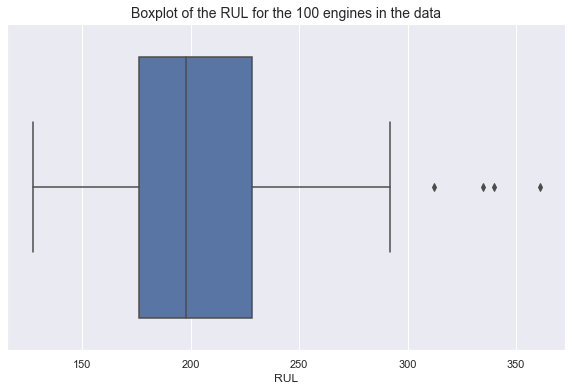

In [25]:
plt.figure(figsize=(10, 6))

sns.boxplot(data = df.groupby('unit_no')['RUL'].describe(), x = 'max')
plt.xlabel('RUL')
plt.title('Boxplot of the RUL for the 100 engines in the data', fontdict={'size':14});

#### Summary stats on the RUL

In [26]:
df.RUL.describe()

count    20631.000000
mean       107.807862
std         68.880990
min          0.000000
25%         51.000000
50%        103.000000
75%        155.000000
max        361.000000
Name: RUL, dtype: float64

### Settings

* setting_1 : Altitude
* setting_2 : Mach number
* setting_3 : TRA

#### setting_1 

In [27]:
df.setting_1.describe()

count    20631.000000
mean        -0.000009
std          0.002187
min         -0.008700
25%         -0.001500
50%          0.000000
75%          0.001500
max          0.008700
Name: setting_1, dtype: float64

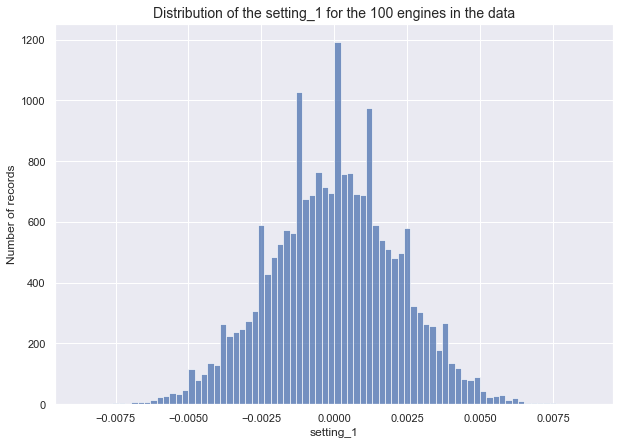

In [28]:
plt.figure(figsize=(10, 7))

sns.histplot(data = df, x='setting_1')
plt.xlabel('setting_1')
plt.ylabel('Number of records')
plt.title('Distribution of the setting_1 for the 100 engines in the data', fontdict={'size':14});

In [29]:
skew(df.setting_1)

-0.024764466039631727

In [30]:
print_skewness_kurtosis('setting_1')

Skewness for setting_1 is -0.024764466039631727
Kurtosis for setting_1 is -0.00942022173171031


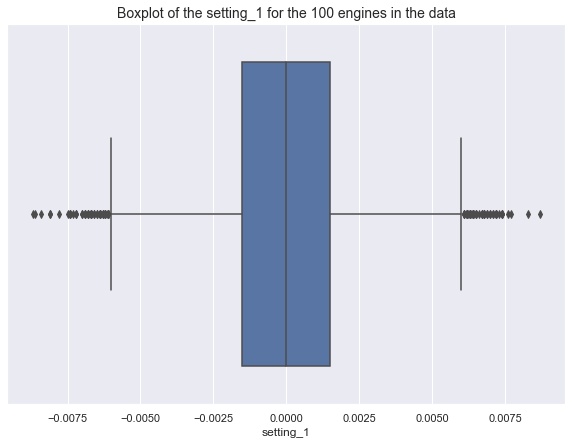

In [31]:
plt.figure(figsize=(10, 7))

sns.boxplot(data = df, x='setting_1')
plt.xlabel('setting_1')
plt.title('Boxplot of the setting_1 for the 100 engines in the data', fontdict={'size':14});

#### setting_2

In [32]:
df.setting_2.describe()

count    20631.000000
mean         0.000002
std          0.000293
min         -0.000600
25%         -0.000200
50%          0.000000
75%          0.000300
max          0.000600
Name: setting_2, dtype: float64

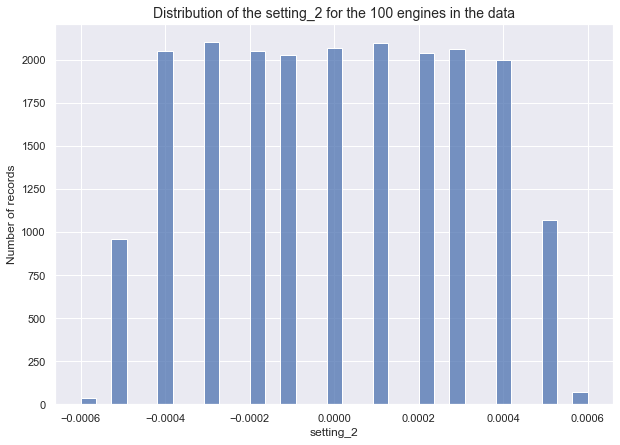

In [33]:
plt.figure(figsize=(10, 7))

sns.histplot(data = df, x='setting_2')
plt.xlabel('setting_2')
plt.ylabel('Number of records')
plt.title('Distribution of the setting_2 for the 100 engines in the data', fontdict={'size':14});

In [34]:
df.setting_2.unique()

array([-0.0004, -0.0003,  0.0003,  0.    , -0.0002, -0.0001,  0.0001,
        0.0002,  0.0004,  0.0005,  0.0006, -0.0005, -0.0006])

#### setting_3 (constant) 

In [35]:
df['setting_3'].unique()

array([100.])

### sensor_2

In [36]:
df.sensor_2.describe()

count    20631.000000
mean       642.680934
std          0.500053
min        641.210000
25%        642.325000
50%        642.640000
75%        643.000000
max        644.530000
Name: sensor_2, dtype: float64

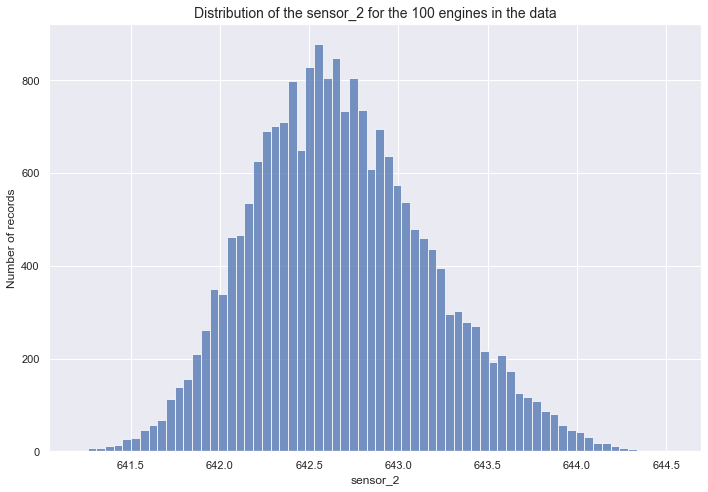

In [37]:
plot_distribution('sensor_2')

In [38]:
print_skewness_kurtosis('sensor_2')

Skewness for sensor_2 is 0.31650287710483815
Kurtosis for sensor_2 is -0.11230660254358771


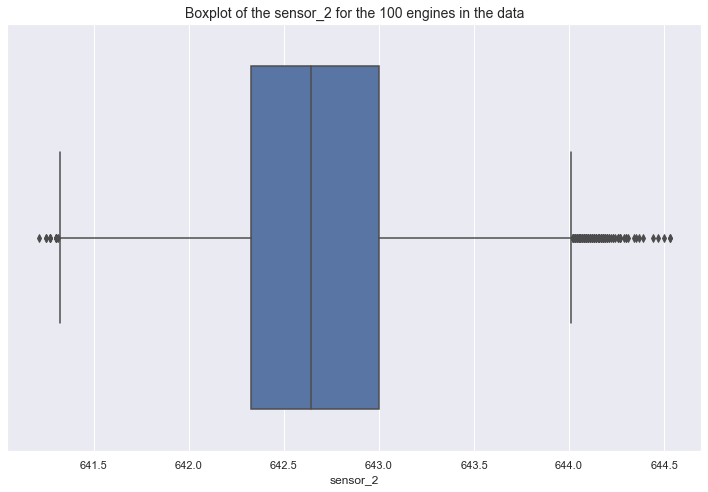

In [39]:
plot_boxplot('sensor_2')

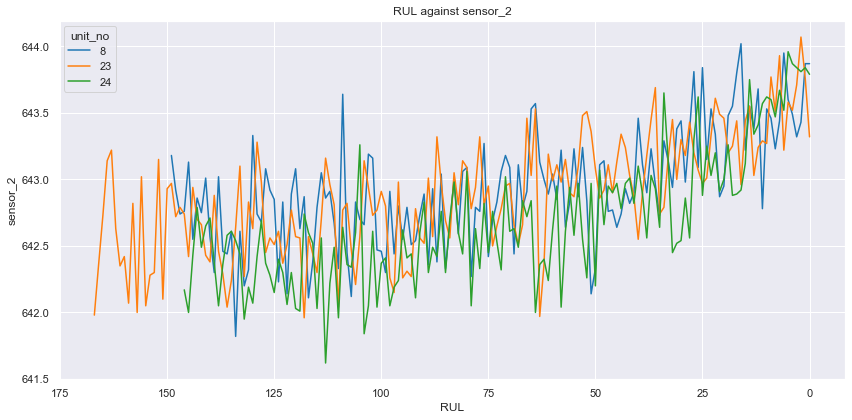

In [40]:
plot_relationship_rul('sensor_2')

### sensor_3

In [41]:
df.sensor_3.describe()

count    20631.000000
mean      1590.523119
std          6.131150
min       1571.040000
25%       1586.260000
50%       1590.100000
75%       1594.380000
max       1616.910000
Name: sensor_3, dtype: float64

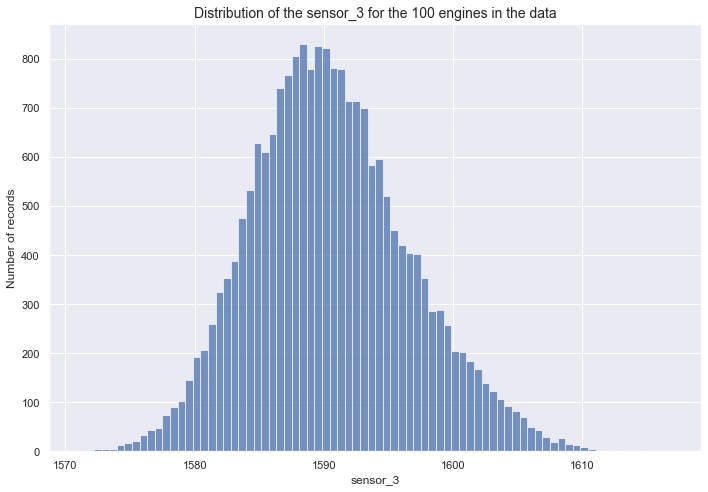

In [42]:
plot_distribution('sensor_3')

In [43]:
print_skewness_kurtosis('sensor_3')

Skewness for sensor_3 is 0.30892334340040095
Kurtosis for sensor_3 is 0.007469131032757925


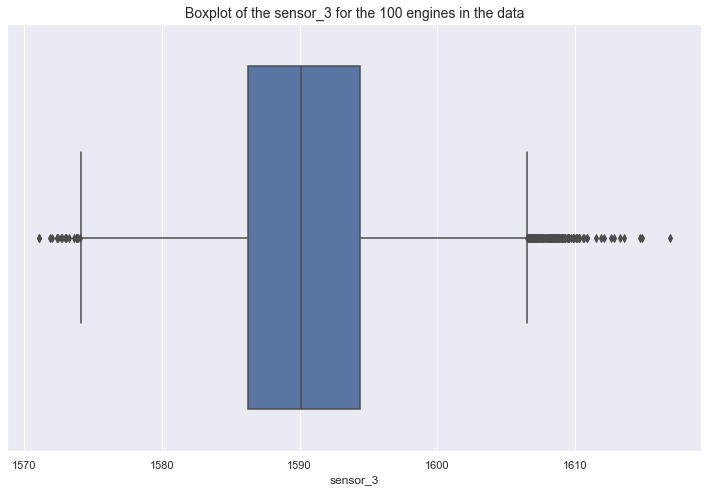

In [44]:
plot_boxplot('sensor_3')

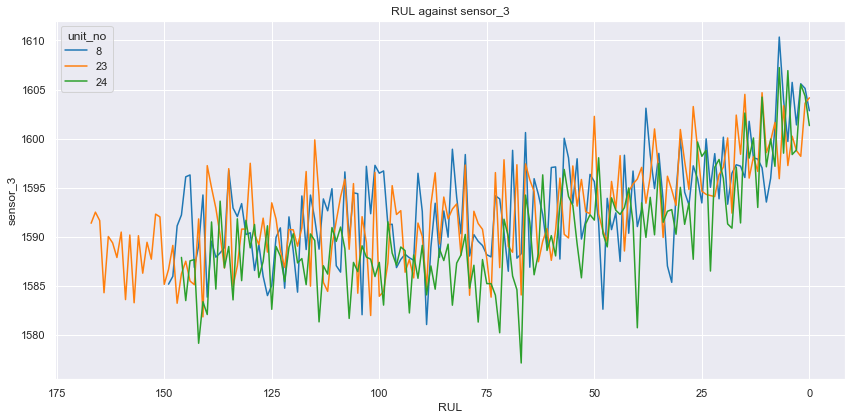

In [45]:
plot_relationship_rul('sensor_3')

### sensor_4

In [46]:
df.sensor_4.describe()

count    20631.000000
mean      1408.933782
std          9.000605
min       1382.250000
25%       1402.360000
50%       1408.040000
75%       1414.555000
max       1441.490000
Name: sensor_4, dtype: float64

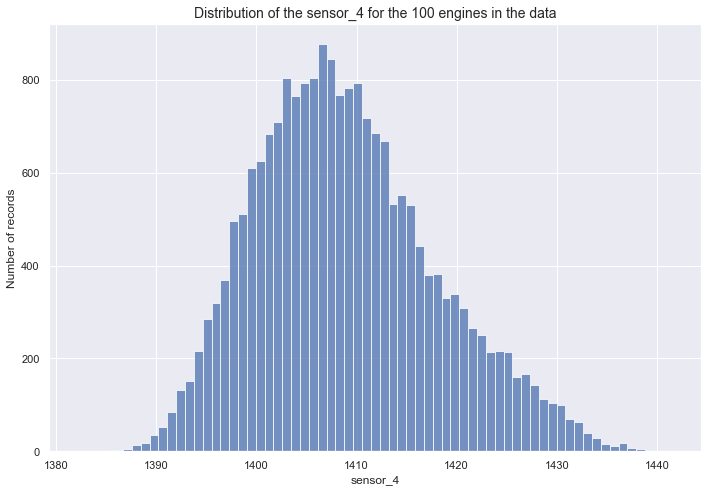

In [47]:
plot_distribution('sensor_4')

In [48]:
print_skewness_kurtosis('sensor_4')

Skewness for sensor_4 is 0.4431621172664209
Kurtosis for sensor_4 is -0.1639320076298474


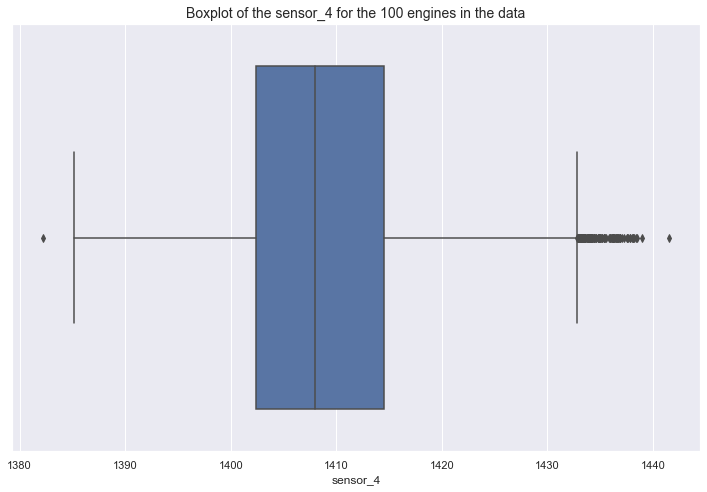

In [49]:
plot_boxplot('sensor_4')

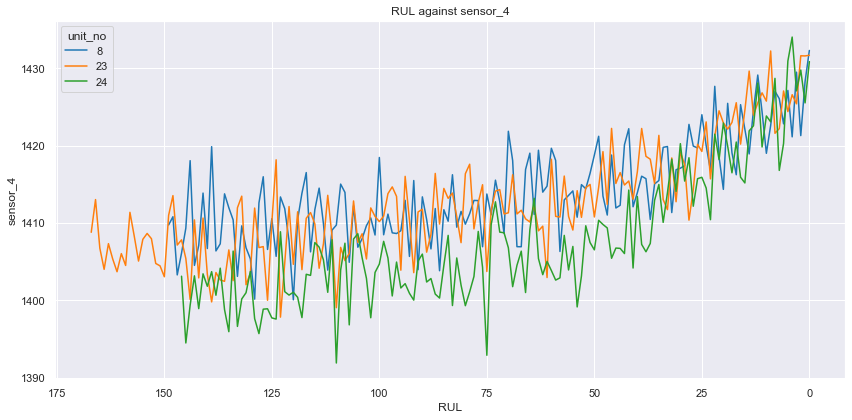

In [50]:
plot_relationship_rul('sensor_4')

### sensor_6

In [51]:
sensor_param[5]

'P15'

In [52]:
df.sensor_6.describe()

count    20631.000000
mean        21.609803
std          0.001389
min         21.600000
25%         21.610000
50%         21.610000
75%         21.610000
max         21.610000
Name: sensor_6, dtype: float64

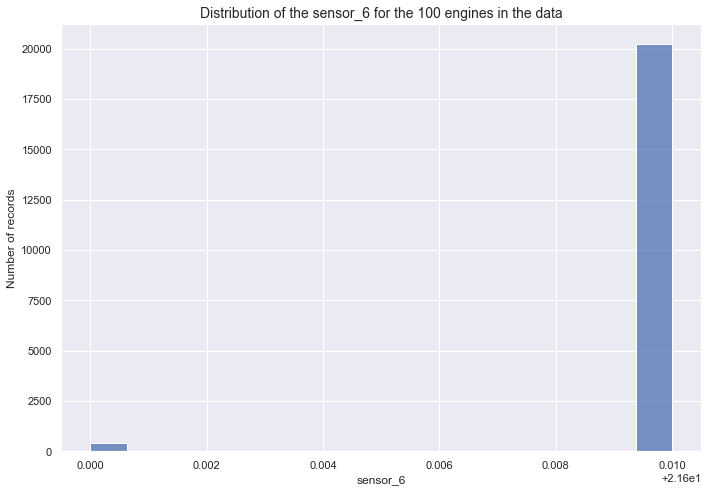

In [53]:
plot_distribution('sensor_6')

In [54]:
df.sensor_6.value_counts()

21.61    20225
21.60      406
Name: sensor_6, dtype: int64

#### Comparison RUL from the sensor_6 (hypothesis testing?)

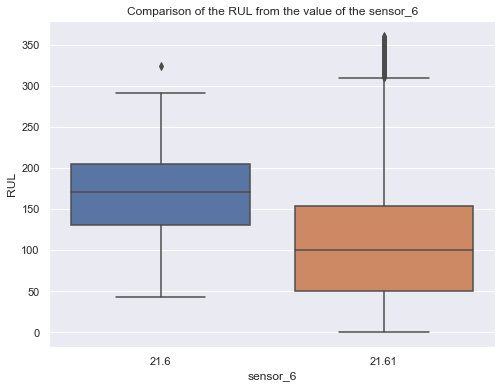

In [55]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sensor_6', y='RUL')
plt.title('Comparison of the RUL from the value of the sensor_6');

### sensor_7

In [56]:
df.sensor_7.describe()

count    20631.000000
mean       553.367711
std          0.885092
min        549.850000
25%        552.810000
50%        553.440000
75%        554.010000
max        556.060000
Name: sensor_7, dtype: float64

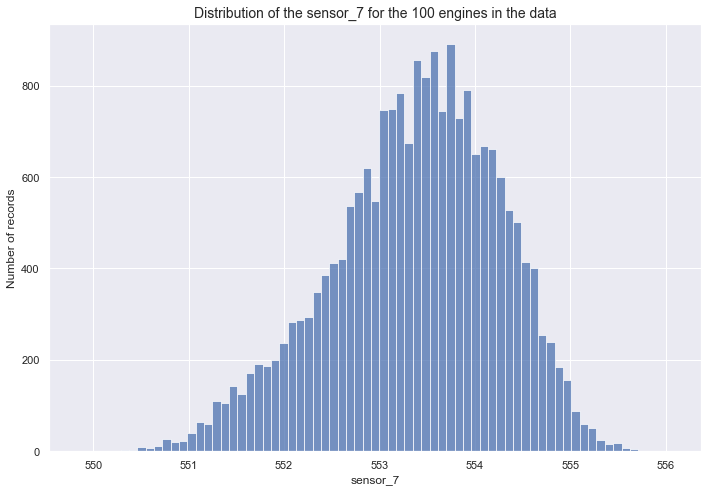

In [57]:
plot_distribution('sensor_7')

In [58]:
print_skewness_kurtosis('sensor_7')

Skewness for sensor_7 is -0.3943002683290926
Kurtosis for sensor_7 is -0.1582017517856551


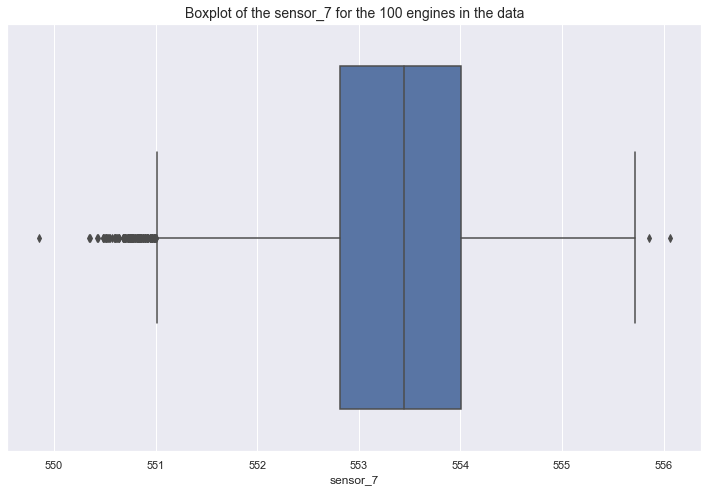

In [59]:
plot_boxplot('sensor_7')

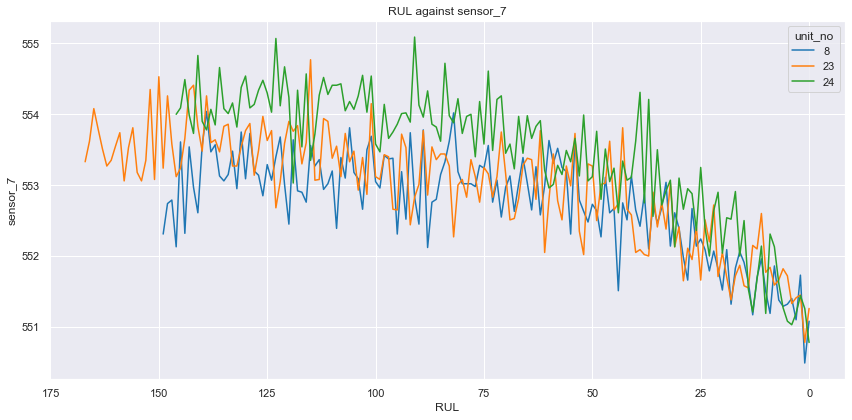

In [60]:
plot_relationship_rul('sensor_7')

### sensor_8

In [61]:
df.sensor_8.describe()

count    20631.000000
mean      2388.096652
std          0.070985
min       2387.900000
25%       2388.050000
50%       2388.090000
75%       2388.140000
max       2388.560000
Name: sensor_8, dtype: float64

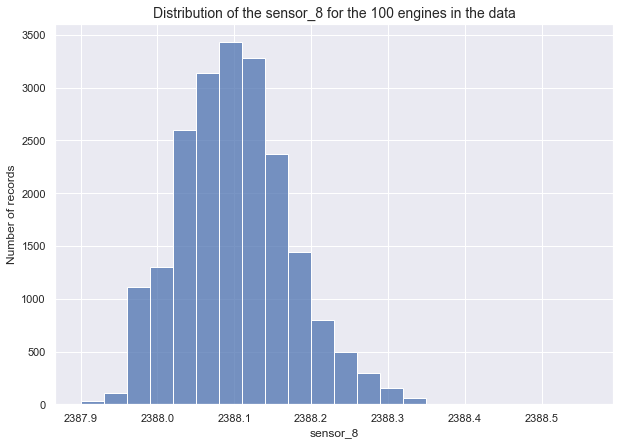

In [62]:
plt.figure(figsize=(10, 7))

sns.histplot(data = df, x='sensor_8', bins=22)
plt.xlabel('sensor_8')
plt.ylabel('Number of records')
plt.title('Distribution of the sensor_8 for the 100 engines in the data', fontdict={'size':14});

In [63]:
print_skewness_kurtosis('sensor_8')

Skewness for sensor_8 is 0.47937600392851976
Kurtosis for sensor_8 is 0.3327774650736286


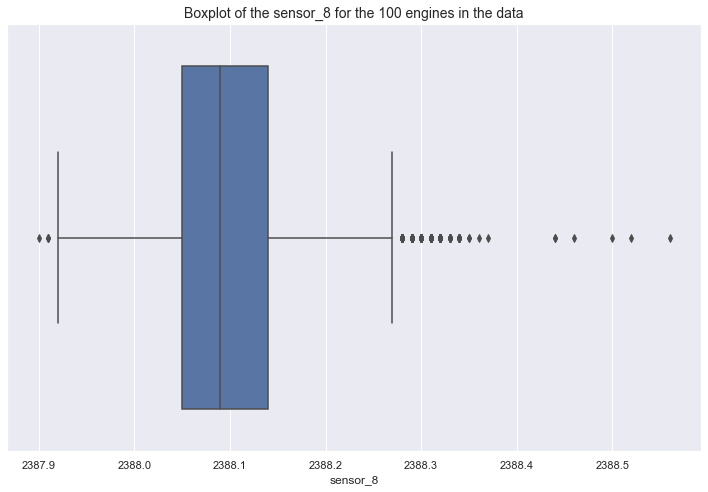

In [64]:
plot_boxplot('sensor_8')

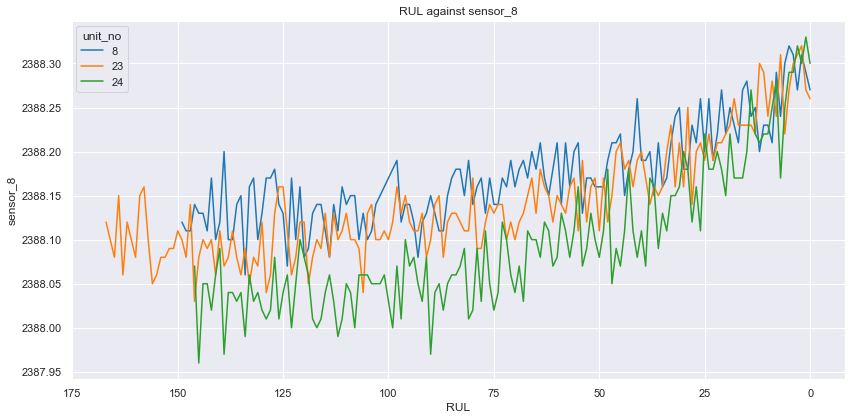

In [65]:
plot_relationship_rul('sensor_8')

### sensor_9

In [66]:
df.sensor_9.describe()

count    20631.000000
mean      9065.242941
std         22.082880
min       9021.730000
25%       9053.100000
50%       9060.660000
75%       9069.420000
max       9244.590000
Name: sensor_9, dtype: float64

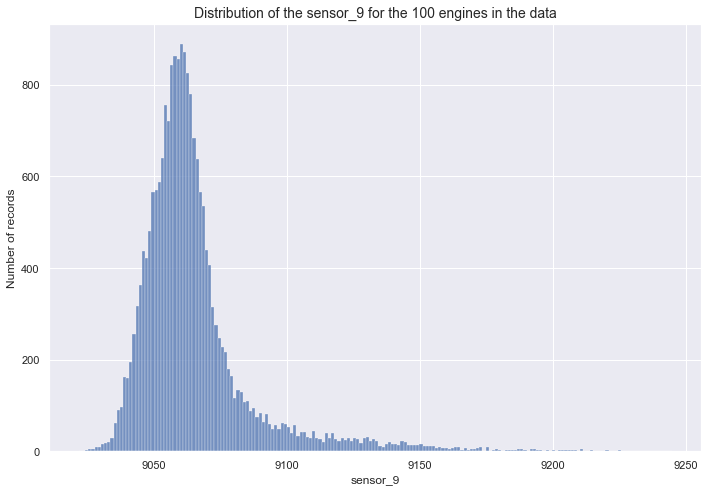

In [67]:
plot_distribution('sensor_9')

In [68]:
print_skewness_kurtosis('sensor_9')

Skewness for sensor_9 is 2.5551790729145165
Kurtosis for sensor_9 is 9.376117696703714


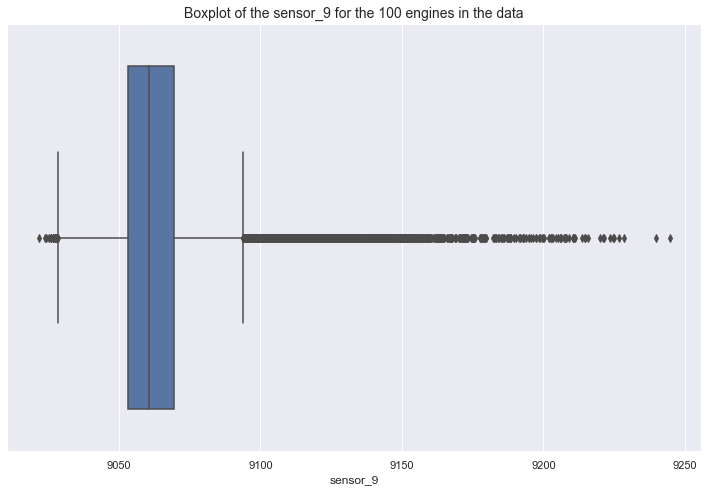

In [69]:
plot_boxplot('sensor_9')

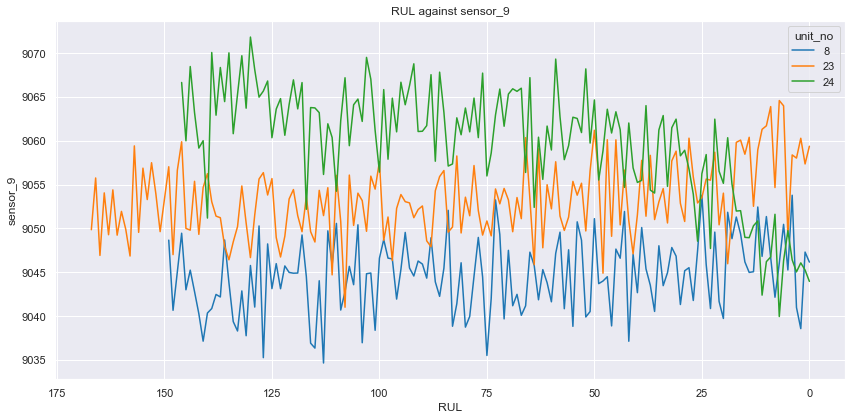

In [70]:
plot_relationship_rul('sensor_9')

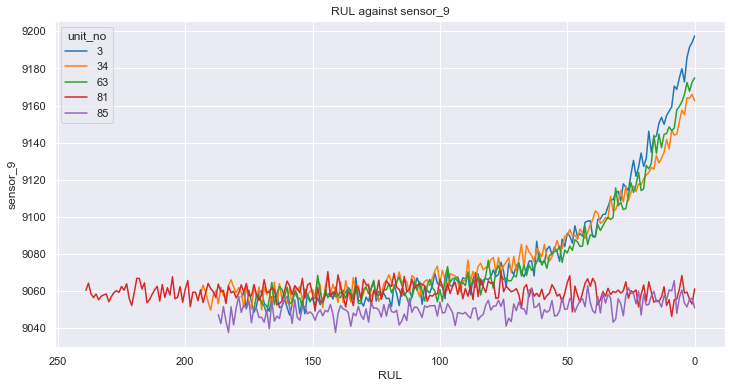

In [71]:
sample_2 = df[df['unit_no'].apply(lambda x: x in [85, 3, 63, 81, 34])]
custom_palette_2 = sns.color_palette("tab10", 5)

fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data = sample_2, x = 'RUL', y = "sensor_9", hue='unit_no', palette=custom_palette_2)
ax.set_title('RUL against {}'.format('sensor_9'))
ax.invert_xaxis()
plt.savefig('./eda_figs/relationship{}'.format('sensor_9'), orientation='landscape')

### sensor_11

In [72]:
df.sensor_11.describe()

count    20631.000000
mean        47.541168
std          0.267087
min         46.850000
25%         47.350000
50%         47.510000
75%         47.700000
max         48.530000
Name: sensor_11, dtype: float64

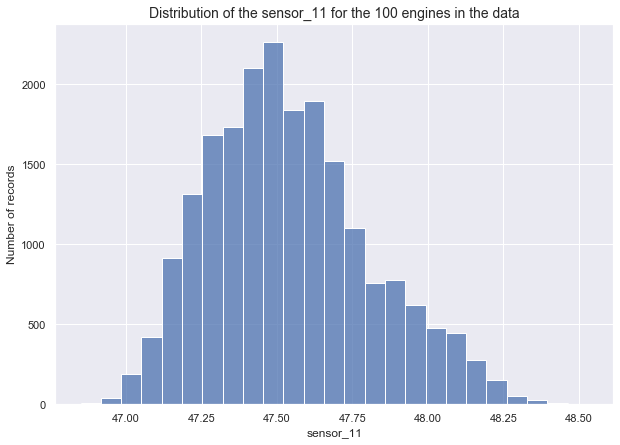

In [73]:
plt.figure(figsize=(10, 7))

sns.histplot(data = df, x='sensor_11', bins=25)
plt.xlabel('sensor_11')
plt.ylabel('Number of records')
plt.title('Distribution of the sensor_11 for the 100 engines in the data', fontdict={'size':14});

In [74]:
print_skewness_kurtosis('sensor_11')

Skewness for sensor_11 is 0.46929496976553836
Kurtosis for sensor_11 is -0.17244096361508365


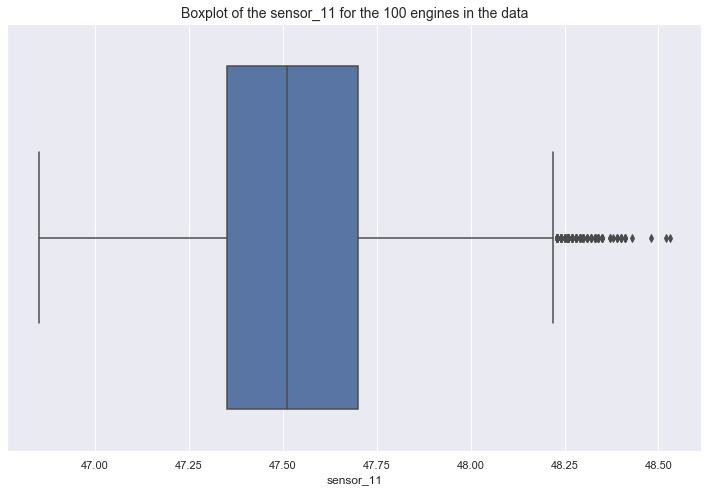

In [75]:
plot_boxplot('sensor_11')

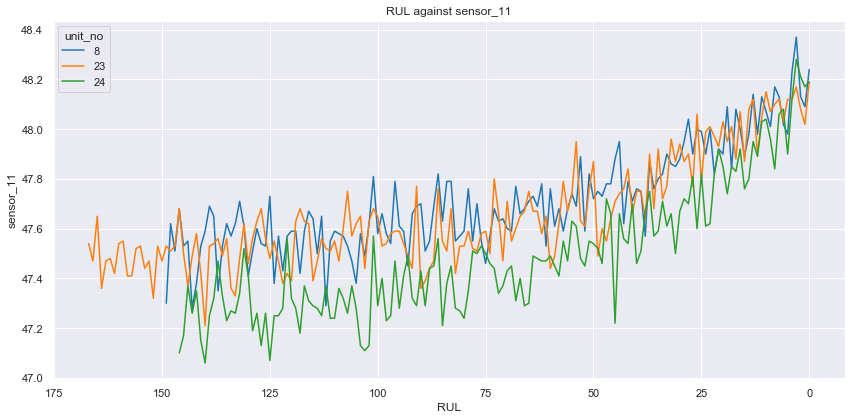

In [76]:
plot_relationship_rul('sensor_11')

### sensor_12

In [77]:
df.sensor_12.describe()

count    20631.000000
mean       521.413470
std          0.737553
min        518.690000
25%        520.960000
50%        521.480000
75%        521.950000
max        523.380000
Name: sensor_12, dtype: float64

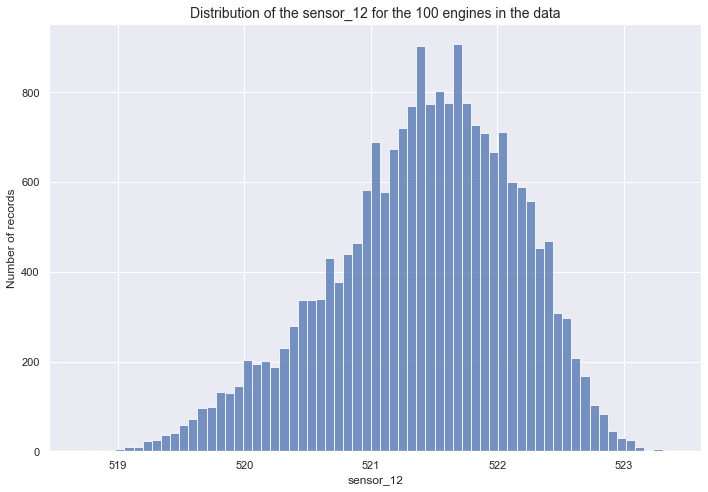

In [78]:
plot_distribution('sensor_12')

In [79]:
print_skewness_kurtosis('sensor_12')

Skewness for sensor_12 is -0.4423750769569851
Kurtosis for sensor_12 is -0.1451722628926313


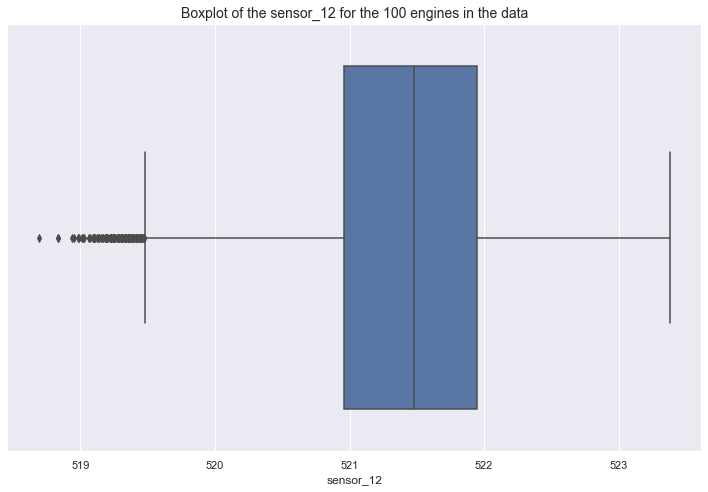

In [80]:
plot_boxplot('sensor_12')

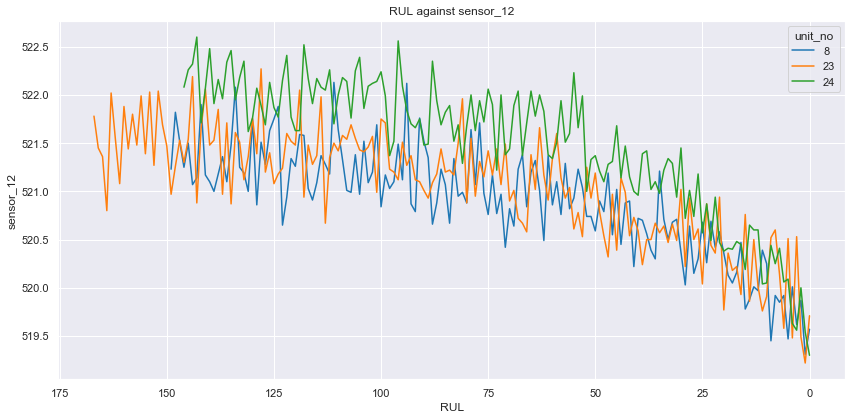

In [81]:
plot_relationship_rul('sensor_12')

### sensor_13

In [82]:
df.sensor_13.describe()

count    20631.000000
mean      2388.096152
std          0.071919
min       2387.880000
25%       2388.040000
50%       2388.090000
75%       2388.140000
max       2388.560000
Name: sensor_13, dtype: float64

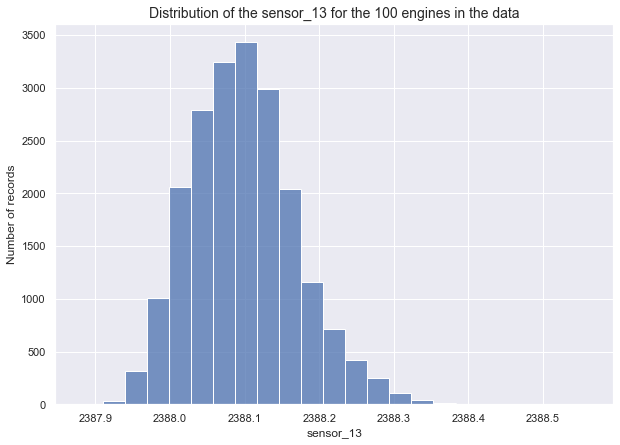

In [83]:
plt.figure(figsize=(10, 7))

sns.histplot(data = df, x='sensor_13', bins=23)
plt.xlabel('sensor_13')
plt.ylabel('Number of records')
plt.title('Distribution of the sensor_13 for the 100 engines in the data', fontdict={'size':14});

In [84]:
print_skewness_kurtosis('sensor_13')

Skewness for sensor_13 is 0.469758264477933
Kurtosis for sensor_13 is 0.38685910375374855


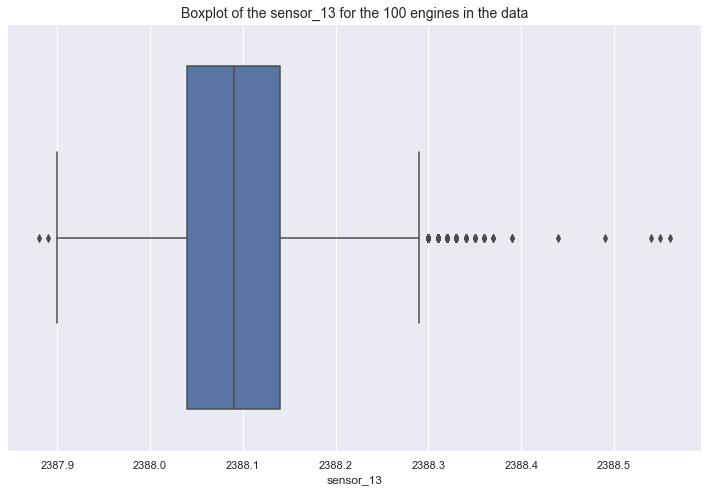

In [85]:
plot_boxplot('sensor_13')

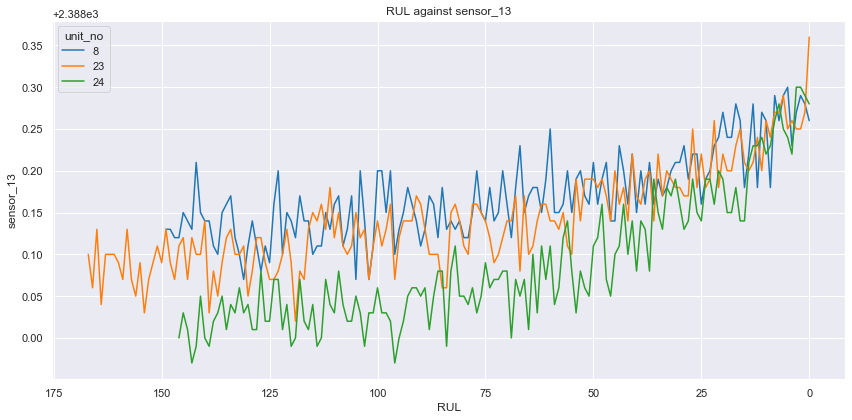

In [86]:
plot_relationship_rul('sensor_13')

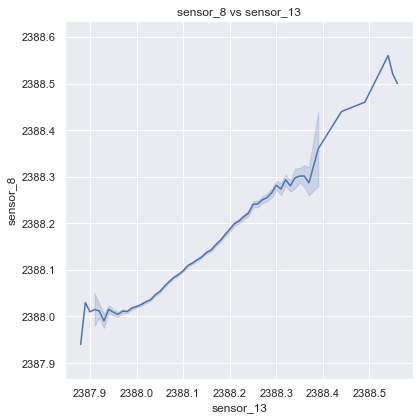

In [87]:
plt.figure(figsize=(6, 6))
sns.lineplot(data = df, y = 'sensor_8', x = 'sensor_13')
plt.axis('equal')
plt.title('sensor_8 vs sensor_13')
plt.tight_layout()
plt.savefig('eda_figs/lineplot_s8_s13');

In [88]:
df[['sensor_8', 'sensor_13']].corr()

,sensor_8,sensor_13
sensor_8,1.000000,0.826084
sensor_13,0.826084,1.000000


### sensor_14

In [89]:
df.sensor_14.describe()

count    20631.000000
mean      8143.752722
std         19.076176
min       8099.940000
25%       8133.245000
50%       8140.540000
75%       8148.310000
max       8293.720000
Name: sensor_14, dtype: float64

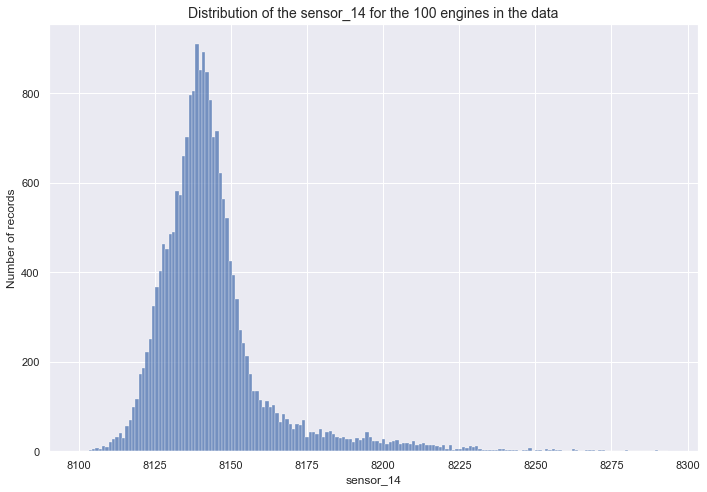

In [90]:
plot_distribution('sensor_14')

In [91]:
print_skewness_kurtosis('sensor_14')

Skewness for sensor_14 is 2.3723811439076226
Kurtosis for sensor_14 is 8.852227833819777


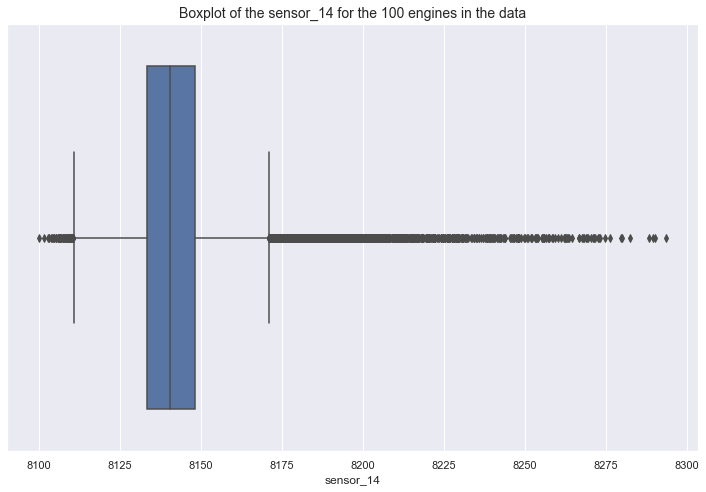

In [92]:
plot_boxplot('sensor_14')

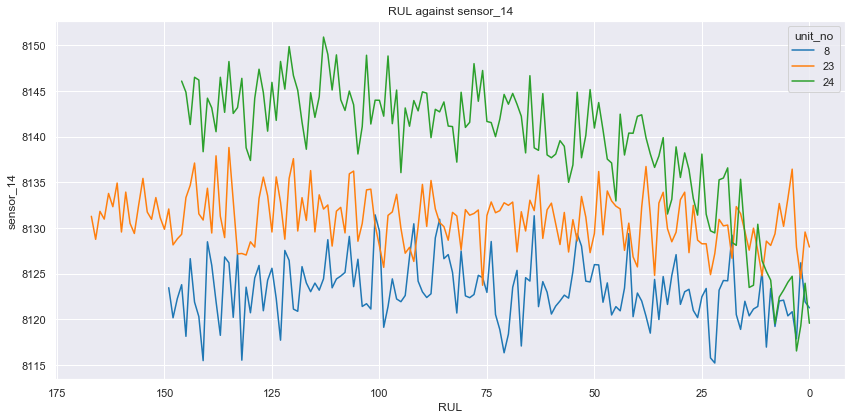

In [93]:
plot_relationship_rul('sensor_14')

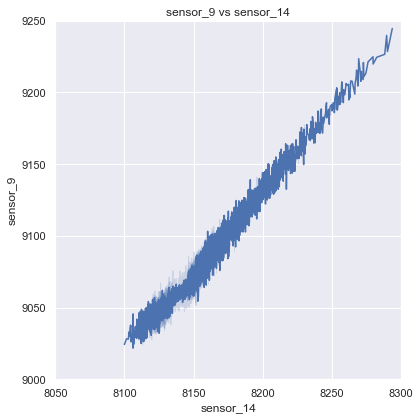

In [94]:
plt.figure(figsize=(6, 6))
sns.lineplot(data = df, y = 'sensor_9', x = 'sensor_14')
plt.title('sensor_9 vs sensor_14')
plt.xlim(8050, 8300)
plt.ylim(9000, 9250)
plt.tight_layout()
plt.savefig('eda_figs/lineplot_s9_s14');

In [95]:
df[['sensor_9', 'sensor_14']].corr()

,sensor_9,sensor_14
sensor_9,1.000000,0.963157
sensor_14,0.963157,1.000000


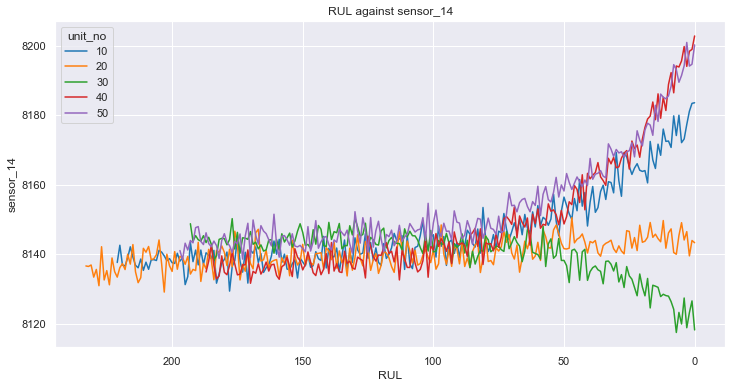

In [96]:
sample_2 = df[df['unit_no'].apply(lambda x: x in [2, 4, 63, 81, 24])]
sample_2 = df[df['unit_no'].apply(lambda x: x in [10, 20, 30, 40, 50])]
custom_palette_2 = sns.color_palette("tab10", 5)

fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data = sample_2, x = 'RUL', y = "sensor_14", hue='unit_no', palette=custom_palette_2)
ax.set_title('RUL against {}'.format('sensor_14'))
ax.invert_xaxis()
#plt.savefig('./eda_figs/relationship2_{}'.format('sensor_13'), orientation='landscape')

### sensor_15

In [97]:
df.sensor_15.describe()

count    20631.000000
mean         8.442146
std          0.037505
min          8.324900
25%          8.414900
50%          8.438900
75%          8.465600
max          8.584800
Name: sensor_15, dtype: float64

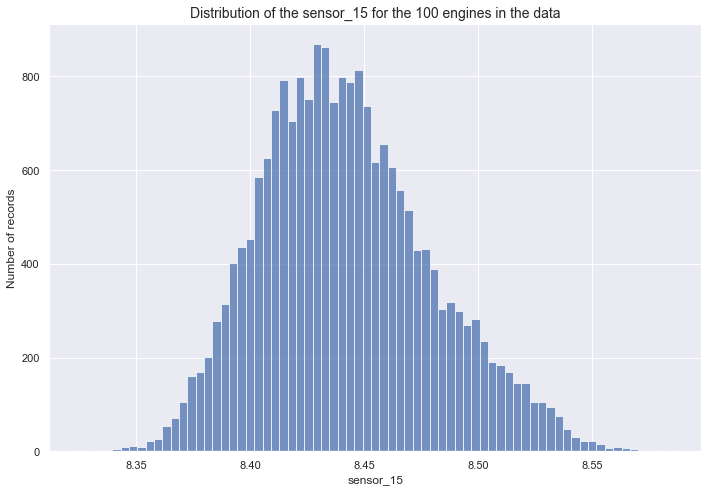

In [98]:
plot_distribution('sensor_15')

In [99]:
print_skewness_kurtosis('sensor_15')

Skewness for sensor_15 is 0.3882303531114805
Kurtosis for sensor_15 is -0.12169138169756089


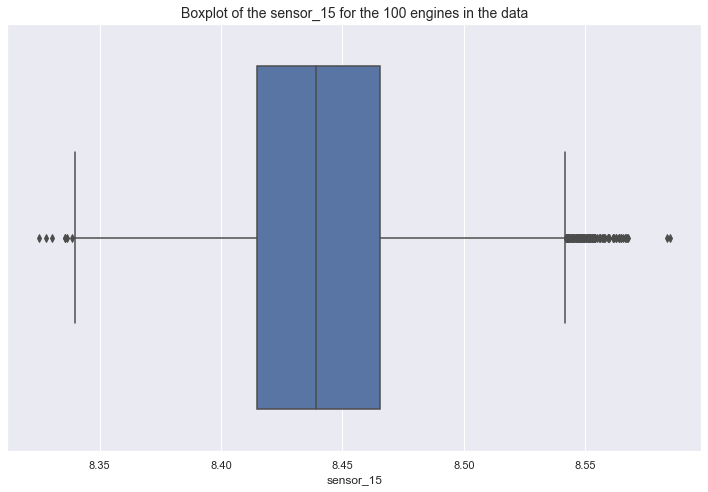

In [100]:
plot_boxplot('sensor_15')

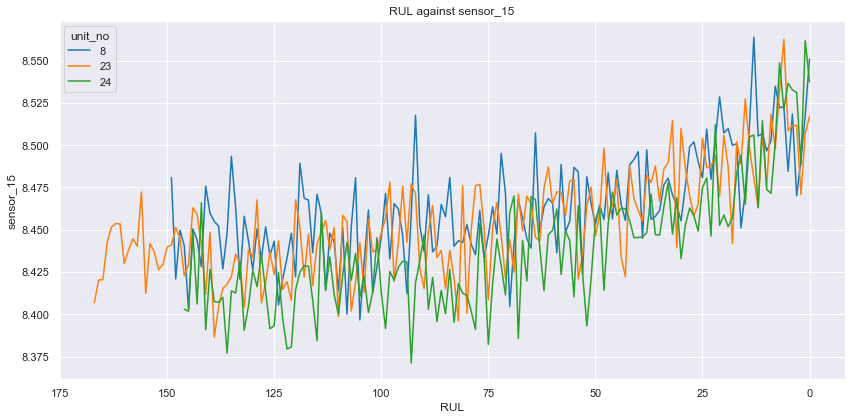

In [101]:
plot_relationship_rul('sensor_15')

### sensor_17

In [102]:
sensor_param[16]

'htBleed'

In [103]:
df.sensor_17.describe()

count    20631.000000
mean       393.210654
std          1.548763
min        388.000000
25%        392.000000
50%        393.000000
75%        394.000000
max        400.000000
Name: sensor_17, dtype: float64

In [104]:
df.sensor_17.value_counts()

393    5445
392    4578
394    4063
395    2339
391    2022
396    1185
390     452
397     436
398      72
389      30
399       7
400       1
388       1
Name: sensor_17, dtype: int64

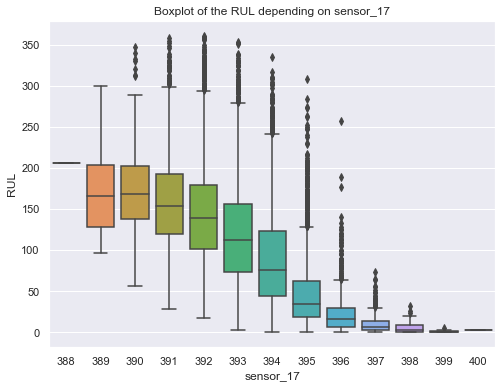

In [105]:
plt.figure(figsize=(8, 6))
sns.boxplot(data = df, x='sensor_17', y='RUL')
plt.title('Boxplot of the RUL depending on sensor_17');

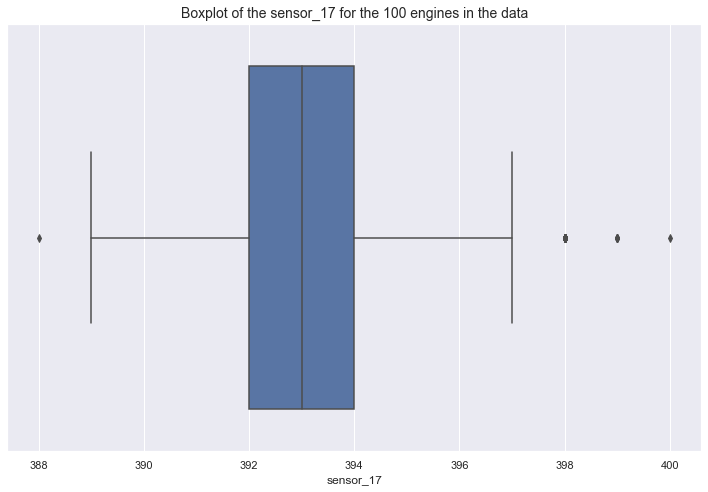

In [106]:
plot_boxplot('sensor_17')

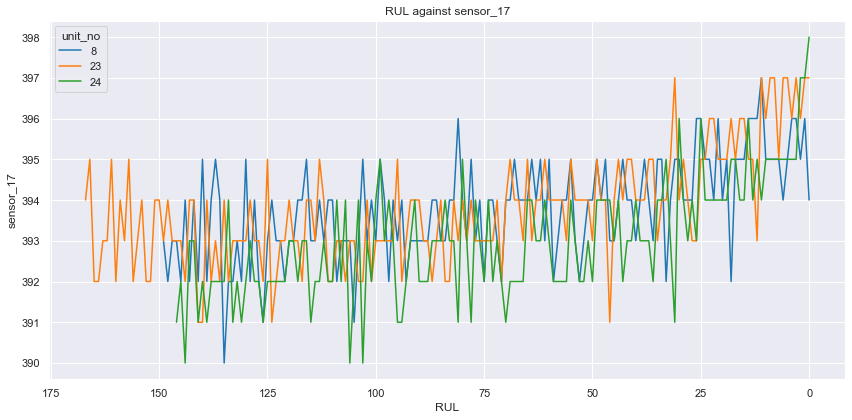

In [107]:
plot_relationship_rul('sensor_17')

### sensor_20

In [108]:
df.sensor_20.describe()

count    20631.000000
mean        38.816271
std          0.180746
min         38.140000
25%         38.700000
50%         38.830000
75%         38.950000
max         39.430000
Name: sensor_20, dtype: float64

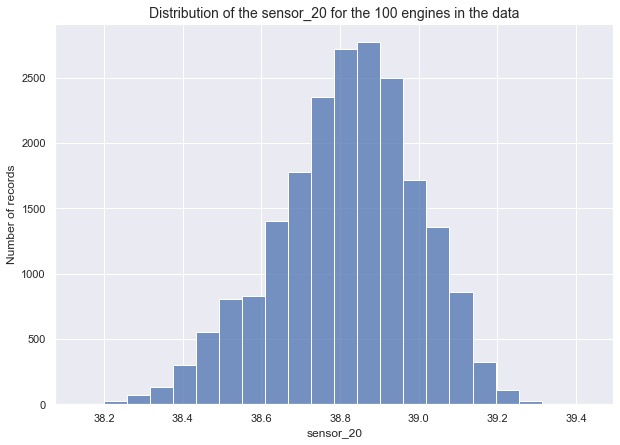

In [109]:
plt.figure(figsize=(10, 7))

sns.histplot(data = df, x='sensor_20', bins=22)
plt.xlabel('sensor_20')
plt.ylabel('Number of records')
plt.title('Distribution of the sensor_20 for the 100 engines in the data', fontdict={'size':14});

In [110]:
print_skewness_kurtosis('sensor_20')

Skewness for sensor_20 is -0.35841914051669777
Kurtosis for sensor_20 is -0.11309257347542001


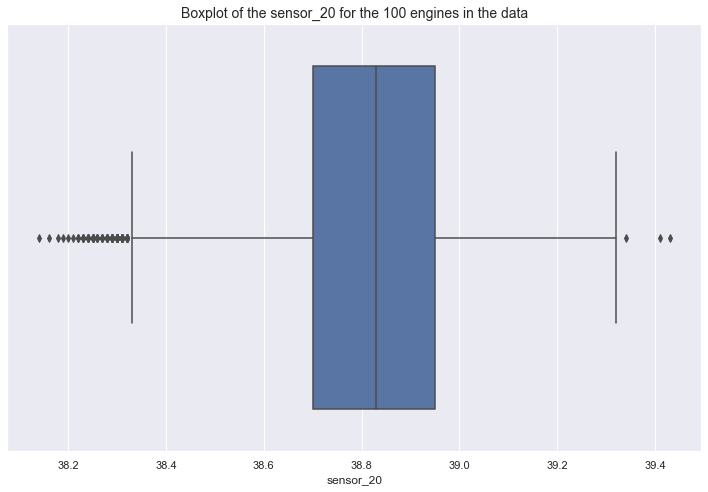

In [111]:
plot_boxplot('sensor_20')

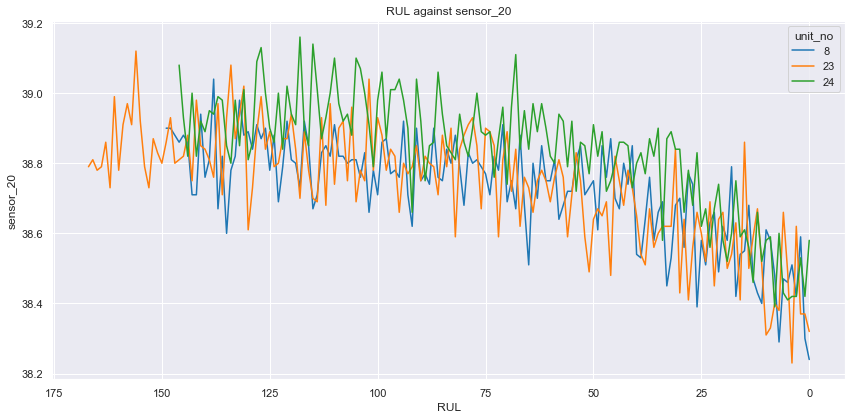

In [112]:
plot_relationship_rul('sensor_20')

### sensor_21

In [113]:
df.sensor_21.describe()

count    20631.000000
mean        23.289705
std          0.108251
min         22.894200
25%         23.221800
50%         23.297900
75%         23.366800
max         23.618400
Name: sensor_21, dtype: float64

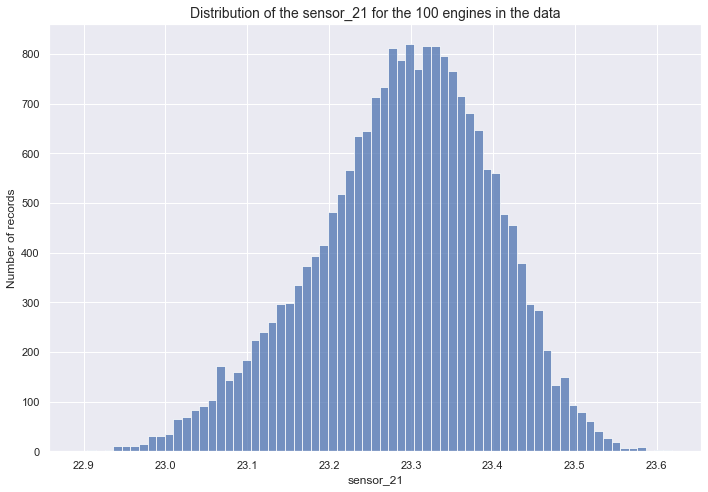

In [114]:
plot_distribution('sensor_21')

In [115]:
print_skewness_kurtosis('sensor_21')

Skewness for sensor_21 is -0.3503494872415972
Kurtosis for sensor_21 is -0.1173018954972691


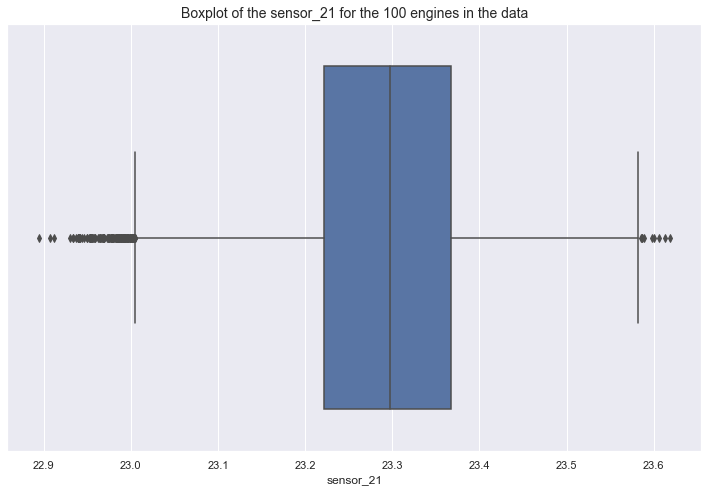

In [116]:
plot_boxplot('sensor_21')

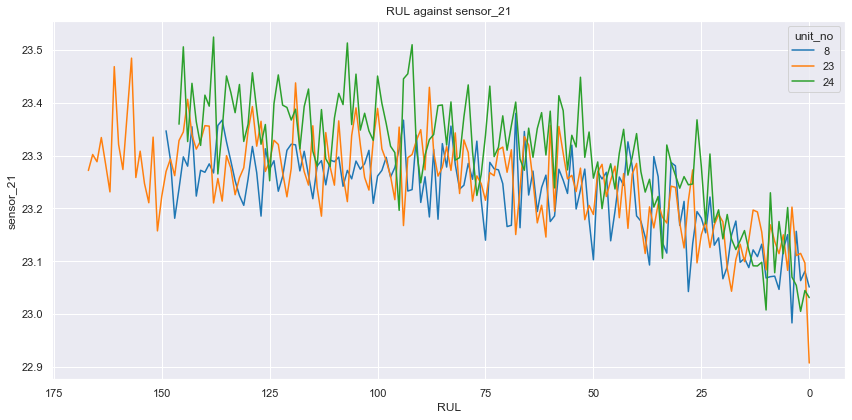

In [117]:
plot_relationship_rul('sensor_21')

## Correlations

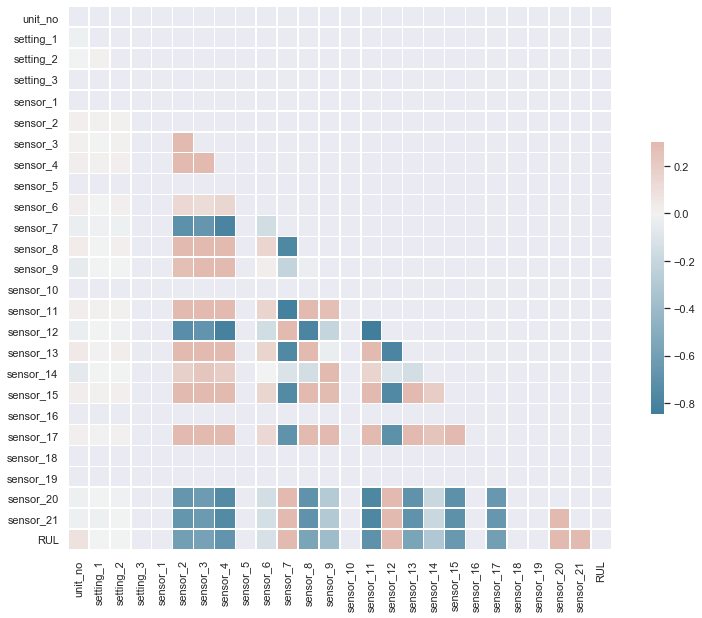

In [118]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

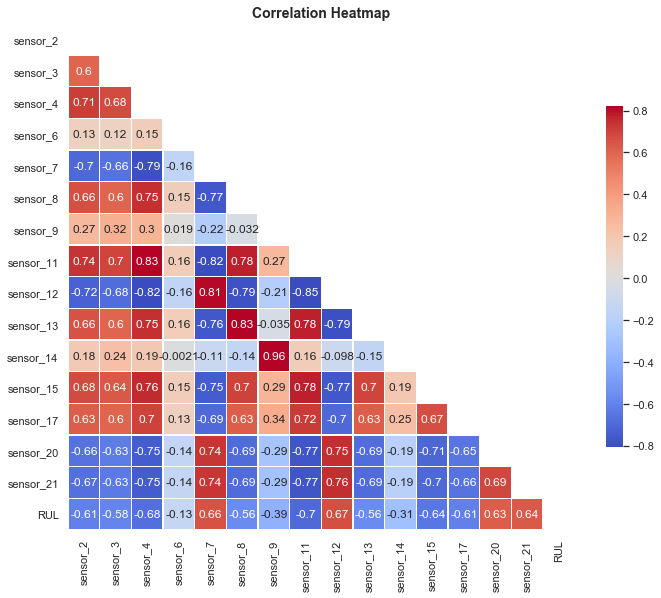

In [135]:
# Compute the correlation matrix
corr = df[remaining_sensors + ['RUL']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
with sns.axes_style('white'):
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, 
                     mask=mask, 
                     robust=True, 
                     cmap = 'coolwarm',
                     square=True, 
                     annot=True, 
                     linewidths=.2, 
                     cbar_kws={"shrink": .5})
    plt.tight_layout()
    plt.title('Correlation Heatmap', fontdict={'fontsize':14, 'weight':'bold'})
    plt.savefig('eda_figs/correlation_matrix', orientation='landscape');

In [120]:
corr[abs(corr) > 0.80]

,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,RUL
sensor_2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sensor_3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sensor_4,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.830136,-0.815591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sensor_6,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sensor_7,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,-0.822805,0.812713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sensor_8,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.826084,NaN,NaN,NaN,NaN,NaN,NaN
sensor_9,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.963157,NaN,NaN,NaN,NaN,NaN
sensor_11,NaN,NaN,0.830136,NaN,-0.822805,NaN,NaN,1.000000,-0.846884,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sensor_12,NaN,NaN,-0.815591,NaN,0.812713,NaN,NaN,-0.846884,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sensor_13,NaN,NaN,NaN,NaN,NaN,0.826084,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
#!pip install --upgrade matplotlib==3.1.2

In [122]:
sensor_param[6]

'P30'

In [123]:
sensor_param[10]

'Ps30'